In [72]:
import os
import torch
import torchmetrics
import torch.nn.functional as F

from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, random_split

import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint
from PIL import Image
import requests
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
import random

In [29]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')


The dataset is extracted


In [33]:
dataset = 'dogs-vs-cats.zip'
extract_to = 'dataset'  # Specify the destination folder here

# Ensure the destination folder exists, if not, create it
os.makedirs(extract_to, exist_ok=True)

with ZipFile(dataset, 'r') as zip:
    zip.extractall(extract_to)
    print('The dataset is extracted to:', extract_to)

The dataset is extracted to: dataset


In [37]:
from zipfile import ZipFile

# Function to extract zip files
def extract_zip(zip_file, extract_to):
    with ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Specify the paths to the zip files and the directories to extract to
train_zip_file = 'content/train.zip'  # Adjust these paths to your train and test zip files
test_zip_file = 'content/test1.zip'
extract_to_train = 'content/train'  # Adjust these paths to the directories where you want to extract the files
extract_to_test = 'content/test1'

# Extract the train zip file
extract_zip(train_zip_file, extract_to_train)
print('Train zip file extracted to:', extract_to_train)

# Extract the test zip file
extract_zip(test_zip_file, extract_to_test)
print('Test zip file extracted to:', extract_to_test)


Train zip file extracted to: dataset/train
Test zip file extracted to: dataset/test1


In [2]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('content/test1'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  12500


Printing the name of images

In [3]:
file_names = os.listdir('content/train')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

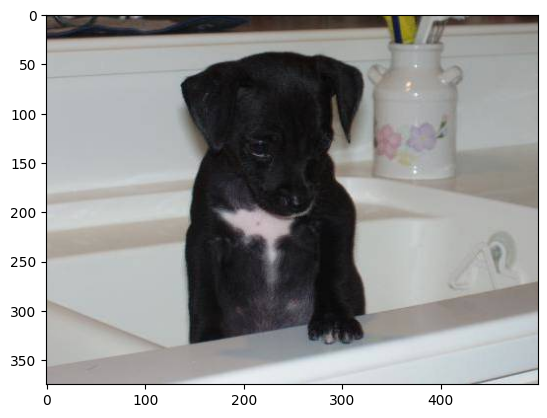

In [4]:
# display dog image
img = mpimg.imread('content/train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

In [5]:
file_names = os.listdir('content/train/')

for i in range(5):

  name = file_names[i] 
  print(name[0:3])

cat
cat
cat
cat
cat


In [2]:
# Create a directory for resized images if it doesn't exist
resized_folder = 'content/image_resized'
os.makedirs(resized_folder, exist_ok=True)

In [3]:
# Define the original folder containing the images
original_folder = 'content/train/'

# Define the desired number of images for each class
num_cats = 1000
num_dogs = 1000



# List all files in the original folder
files = os.listdir(original_folder)

# Shuffle the list of files randomly
random.shuffle(files)

# Counters for the number of processed images for each class
cats_processed = 0
dogs_processed = 0

# Loop through each file in the shuffled list
for filename in files:
    try:
        img_path = os.path.join(original_folder, filename)

        # Split the filename to get the prefix (cat or dog)
        prefix = filename.split('.')[0]

        # Check if the filename belongs to a cat or a dog
        if prefix == 'cat' and cats_processed < num_cats:
            cats_processed += 1
        elif prefix == 'dog' and dogs_processed < num_dogs:
            dogs_processed += 1
        else:
            continue  # Skip this image if it doesn't meet the criteria
        
        # Open the image
        img = Image.open(img_path)

        # Resize the image to 224x224
        img = img.resize((224, 224))

        # Convert the image to RGB if it's not already in RGB format
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Save the resized image to the resized folder
        new_img_path = os.path.join(resized_folder, filename)
        img.save(new_img_path)

        # print(f"{filename} copied, resized to 224x224, and converted to RGB successfully.")

        # Check if the desired number of images for each class has been reached
        if cats_processed == num_cats and dogs_processed == num_dogs:
            break

    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")

In [2]:
print(new_img_path)

NameError: name 'new_img_path' is not defined

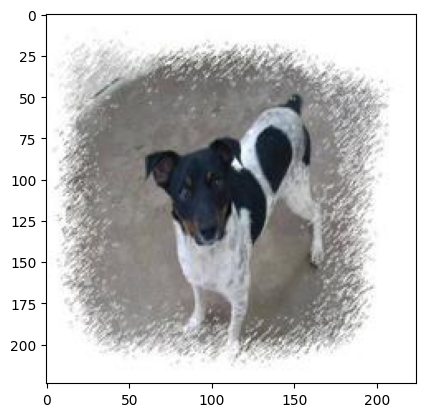

In [20]:
# display resized dog image
img = mpimg.imread('content/image_resized/dog.436.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat --> 0

Dog --> 1

In [9]:
# creaing a for loop to assign labels
filenames = os.listdir('content/image_resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [10]:
print(filenames[0:1165])
print(len(filenames))

['cat.10002.jpg', 'cat.10004.jpg', 'cat.10010.jpg', 'cat.10015.jpg', 'cat.10018.jpg', 'cat.10025.jpg', 'cat.10030.jpg', 'cat.10049.jpg', 'cat.10064.jpg', 'cat.10066.jpg', 'cat.10070.jpg', 'cat.10077.jpg', 'cat.10083.jpg', 'cat.10086.jpg', 'cat.10110.jpg', 'cat.10112.jpg', 'cat.10118.jpg', 'cat.10132.jpg', 'cat.10140.jpg', 'cat.10141.jpg', 'cat.10158.jpg', 'cat.10169.jpg', 'cat.10171.jpg', 'cat.10177.jpg', 'cat.10186.jpg', 'cat.10188.jpg', 'cat.10198.jpg', 'cat.10205.jpg', 'cat.10206.jpg', 'cat.10215.jpg', 'cat.10219.jpg', 'cat.10230.jpg', 'cat.10238.jpg', 'cat.10239.jpg', 'cat.10241.jpg', 'cat.10248.jpg', 'cat.10250.jpg', 'cat.10260.jpg', 'cat.10270.jpg', 'cat.10292.jpg', 'cat.10303.jpg', 'cat.10312.jpg', 'cat.10314.jpg', 'cat.10333.jpg', 'cat.10335.jpg', 'cat.10336.jpg', 'cat.10353.jpg', 'cat.10366.jpg', 'cat.1037.jpg', 'cat.10376.jpg', 'cat.10391.jpg', 'cat.10393.jpg', 'cat.10394.jpg', 'cat.10405.jpg', 'cat.10409.jpg', 'cat.10411.jpg', 'cat.10430.jpg', 'cat.10437.jpg', 'cat.10441.jpg

In [11]:
print(labels[999:1005])
print(len(labels))

[0, 1, 1, 1, 1, 1]
2000


Converting all the resized images to numpy arrays

In [12]:
import cv2
import glob
import numpy as np
from sklearn.model_selection import train_test_split


In [13]:
image_directory = 'content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [14]:
print(dog_cat_images)

[[[[ 54  59  57]
   [ 55  60  58]
   [ 56  61  59]
   ...
   [ 57  69  73]
   [ 57  69  73]
   [ 57  69  73]]

  [[ 54  59  57]
   [ 55  60  58]
   [ 56  61  59]
   ...
   [ 57  69  73]
   [ 57  69  73]
   [ 57  69  73]]

  [[ 55  60  58]
   [ 56  61  59]
   [ 57  62  60]
   ...
   [ 57  69  73]
   [ 57  69  73]
   [ 57  69  73]]

  ...

  [[ 42  53  61]
   [ 42  53  61]
   [ 42  53  61]
   ...
   [ 26  34  41]
   [ 18  26  33]
   [ 12  20  27]]

  [[ 42  53  61]
   [ 42  53  61]
   [ 42  53  61]
   ...
   [ 24  32  39]
   [ 16  24  31]
   [ 10  18  25]]

  [[ 42  53  61]
   [ 42  53  61]
   [ 42  53  61]
   ...
   [ 24  32  39]
   [ 16  24  31]
   [ 10  18  25]]]


 [[[ 56  55 123]
   [ 61  60 128]
   [ 63  62 130]
   ...
   [ 81  82 150]
   [ 73  75 140]
   [ 68  70 135]]

  [[ 56  55 123]
   [ 59  58 126]
   [ 61  60 128]
   ...
   [ 67  68 136]
   [ 66  68 133]
   [ 68  70 135]]

  [[ 57  56 124]
   [ 57  56 124]
   [ 57  56 124]
   ...
   [ 67  68 136]
   [ 71  73 138]
   [ 77  79

In [15]:
type(dog_cat_images)

numpy.ndarray

In [16]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [17]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [20]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [21]:
print(X_train_scaled)

[[[[0.16078431 0.11372549 0.0745098 ]
   [0.16078431 0.11372549 0.0745098 ]
   [0.16078431 0.10980392 0.07843137]
   ...
   [0.24313725 0.29019608 0.30588235]
   [0.23921569 0.28627451 0.30196078]
   [0.23529412 0.28235294 0.29803922]]

  [[0.16470588 0.11764706 0.07843137]
   [0.16470588 0.11764706 0.07843137]
   [0.16470588 0.11372549 0.08235294]
   ...
   [0.24705882 0.29411765 0.30980392]
   [0.24313725 0.29019608 0.30588235]
   [0.24313725 0.29019608 0.30588235]]

  [[0.17647059 0.12941176 0.09019608]
   [0.17254902 0.1254902  0.08627451]
   [0.17254902 0.1254902  0.08627451]
   ...
   [0.25882353 0.30588235 0.32156863]
   [0.25490196 0.30196078 0.31764706]
   [0.25098039 0.29803922 0.31372549]]

  ...

  [[0.0745098  0.07843137 0.11764706]
   [0.0745098  0.07843137 0.11764706]
   [0.0745098  0.07843137 0.11764706]
   ...
   [0.2        0.24313725 0.25882353]
   [0.19607843 0.23921569 0.25490196]
   [0.19215686 0.23529412 0.25098039]]

  [[0.07058824 0.0745098  0.11372549]
   [0.0

In [53]:
# import tensorflow as tf
# import tensorflow_hub as hub
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset


In [54]:
# Define the number of output classes
num_of_classes = 2

In [55]:
# Define the ResNet-18 model
resnet_model = models.resnet18(pretrained=True)
num_features = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(num_features, 2)  # Assuming 2 output classes

In [56]:
# Define the loss function
criterion = nn.CrossEntropyLoss()

In [57]:
# Define the optimizer
optimizer = optim.Adam(resnet_model.parameters(), lr=0.001)

In [58]:
# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model = resnet_model.to(device)

In [59]:
# Create DataLoader
batch_size = 32
train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train_scaled), torch.tensor(Y_train))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [60]:
# Training loop
epochs = 5
for epoch in range(epochs):
    resnet_model.train()
    for inputs, labels in train_loader:
        inputs = inputs.float().permute(0, 3, 1, 2).to(device)  # Convert to FloatTensor and transpose dimensions
        labels = labels.long().to(device)  # Convert labels to LongTensor
        optimizer.zero_grad()
        outputs = resnet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


In [61]:
# Evaluation
resnet_model.eval()
test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test_scaled), torch.tensor(Y_test))
test_loader = DataLoader(test_dataset, batch_size=batch_size)


In [63]:
resnet_model.eval()  # Set the model to evaluation mode

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.float().permute(0, 3, 1, 2).to(device)  # Convert to FloatTensor and transpose dimensions
        labels = labels.to(device)  # Move labels to the same device as inputs

        # Forward pass
        outputs = resnet_model(inputs)

        # Get predicted labels
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [64]:
# Check if total is zero to avoid division by zero
if total != 0:
    # Calculate accuracy
    accuracy = correct / total
    print('Test Accuracy: {:.2f}%'.format(100 * accuracy))
else:
    print('No samples in the test dataset.')

Test Accuracy: 91.75%


Path of the image to be predicted:  content/5.jpg


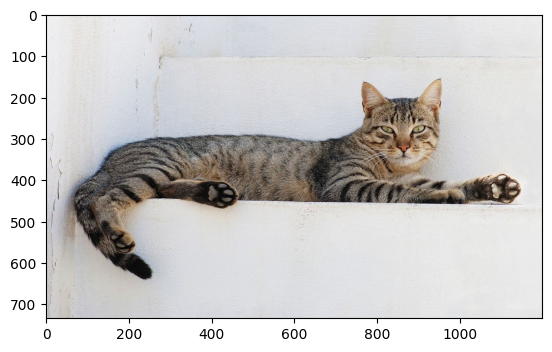

The image represents a Cat


In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path of the image to be predicted
input_image_path = input('Path of the image to be predicted: ')

# Read the input image
input_image = cv2.imread(input_image_path)

# Check if the image was read successfully
if input_image is None:
    print("Error: Unable to read the input image.")
    exit()

# Display the input image
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.show()

# Resize and scale the input image
input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize / 255.0

# Reshape the input image for prediction
input_image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Convert to PyTorch tensor and move to device
input_tensor = torch.tensor(input_image_reshaped, dtype=torch.float32).permute(0, 3, 1, 2).to(device)

# Perform prediction using the model
with torch.no_grad():
    resnet_model.eval()
    output = resnet_model(input_tensor)

# Get the predicted label
predicted_label = torch.argmax(output).item()

# Display the prediction result
if predicted_label == 0:
    print('The image represents a Cat')
else:
    print('The image represents a Dog')


In [77]:
!wget -r -N -c -np -nH --cut-dirs=1 \
--user YOUR_PHYSIONET_USERNAME \
--ask-password -i FILES \
--base=https://physionet.org/files/mimic-cxr-jpg/2.1.0/




'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!wget -r -N -c -np -nH --cut-dirs=1 --user YOUR_PHYSIONET_USERNAME --ask-password -i FILES --base=https://physionet.org/files/mimic-cxr-jpg/2.1.0/


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [81]:
!pip install wget